In [ ]:
# SafeGraph Functions: https://github.com/SafeGraphInc/safegraph_py
#!pip install -q --upgrade git+https://github.com/SafeGraphInc/safegraph_py

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
from hagerstrand import dataprocess

In [2]:
stores = pd.read_csv(r"C:\Users\jfeng\Graduate School Coursework Materials\Dissertation\Safegraph_GroceryStores_Patterns_Dec_2020_Feb_2021\February 2021 Activity\core_poi-geometry-patterns-sgpid.csv")
safegraph = pd.read_csv(r"C:\Users\jfeng\Graduate School Coursework Materials\Dissertation\2020_03_SafeGraph_Patterns\2020-03-patterns\core_poi-patterns.csv", index_col=0)

In [3]:
# Extend data frames with custom class and functions
stores = dataprocess.ExtendedDataFrame(stores)

# Remove duplicate entries
stores = stores.deduplicate(["customer_FullAddress"])

In [4]:
len(stores)

126

In [5]:
# 20 Stores without Foot Traffic Information
stores[stores["visitor_home_cbgs"].isnull()]

,Unnamed: 0,customer_Title,customer_StreetAddress,customer_FullAddress,customer_NumReviews,customer_PlusCode,customer_GMAPReviewURL,customer_GMAPPOIURL,customer_Category,customer_Street,customer_City,customer_State,customer_ZipCode,other_match_candidates,number_of_candidate_matches,warnings,is_closed,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,safegraph_brand_ids,location_name,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,polygon_wkt,polygon_class,building_height,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
10,10,Publix Super Market at Valley Forge Shopping C...,NaN,"2656 Parkway, Pigeon Forge, TN 37863",1141,"RC3F+2F Pigeon Forge, Tennessee",https://www.google.com/maps/place/Publix+Super...,https://www.google.com/maps/place/Publix+Super...,Grocery,2656 Parkway,Pigeon Forge,TN,37863,NaN,1,NaN,False,zzw-223@8g9-ff3-fs5,sg:50577ed401684dfd8b933d1092d12da9,225-222@8g9-ff3-fs5,sg:7cf62ae96d5445b7ad2cd09ab0be48e0,SG_BRAND_8816cf3aede474ecbdb03d62efaad185,Publix Super Markets,Publix Super Markets,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,35.802527,-83.576340,2656 Parkway,Pigeon Forge,TN,37863.0,NaN,NaN,POLYGON ((-83.57584556835317 35.80249641953792...,OWNED_POLYGON,NaN,True,NaN,False,False,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,Ingles Market,215 Cedar Ln,"215 Cedar Ln, Knoxville, TN 37912",853,"228J+54 Knoxville, Tennessee",https://www.google.com/maps/place/Ingles+Marke...,https://www.google.com/maps/place/Ingles+Marke...,Grocery,215 Cedar Ln,Knoxville,TN,37912,NaN,1,NaN,False,222-224@8g9-xnz-7wk,sg:c1effc4b0c634d2e99a0ad7ff0c7bcb4,NaN,NaN,SG_BRAND_e092603330cf86134b1426d0d3238169,Ingles Markets,Ingles Markets,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,36.015467,-83.969631,215 Cedar Ln,Knoxville,TN,37912.0,"{ ""Mon"": [[""7:00"", ""24:00""]], ""Tue"": [[""7:00"",...",NaN,POLYGON ((-83.96974228756062 36.01493874227223...,SHARED_POLYGON,NaN,False,NaN,False,False,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,22,Kroger,1820 Roane State Hwy,"1820 Roane State Hwy, Harriman, TN 37748",623,"VCRX+RP Harriman, Tennessee",https://www.google.com/maps/place/Kroger/@35.8...,https://www.google.com/maps/search/Kroger%0918...,Grocery,1820 Roane State Hwy,Harriman,TN,37748,sg:407bb8dcb6dd4f0c880956377c2fc66a,2,NaN,False,zzw-222@8g8-yq9-vzz,sg:d505ade1b929492a807fd37e379d56cf,222-223@8g8-yqb-835,sg:4378c6444cf141dd84a15d8e0e7c70b2,SG_BRAND_1f852a23da4b7250,Kroger,Kroger,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,35.891750,-84.551095,1820 Roane State Hwy,Harriman,TN,37748.0,NaN,NaN,"POLYGON ((-84.550512 35.892685, -84.550086 35....",SHARED_POLYGON,NaN,True,NaN,False,False,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,Magana Mexican Store,500 W Broadway St,"500 W Broadway St, Lenoir City, TN 37771",17,"QPVQ+88 Lenoir City, Tennessee",https://www.google.com/maps/place/Magana+Mexic...,https://www.google.com/maps/place/Magana+Mexic...,Grocery,500 W Broadway St,Lenoir City,TN,37771,NaN,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,29,United Grocery Outlet,"Midland Plaza, 148 S Calderwood St","Midland Plaza, 148 S Calderwood St, Alcoa, TN ...",253,"Q26C+F9 Alcoa, Tennessee",https://www.google.com/maps/place/United+Groce...,https://www.google.com/maps/place/United+Groce...,Grocery,"Midland Plaza, 148 S

In [10]:
# 5 Stores without matching places in SafeGraph
stores[stores["placekey"].isnull()]

,customer_Title,customer_StreetAddress,customer_FullAddress,customer_NumReviews,customer_PlusCode,customer_GMAPReviewURL,customer_GMAPPOIURL,customer_Category,customer_Street,customer_City,customer_State,customer_ZipCode,other_match_candidates,number_of_candidate_matches,warnings,is_closed,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,safegraph_brand_ids,location_name,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,polygon_wkt,polygon_class,building_height,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
28,Magana Mexican Store,500 W Broadway St,"500 W Broadway St, Lenoir City, TN 37771",17,"QPVQ+88 Lenoir City, Tennessee",https://www.google.com/maps/place/Magana+Mexic...,https://www.google.com/maps/place/Magana+Mexic...,Grocery,500 W Broadway St,Lenoir City,TN,37771,NaN,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,United Grocery Outlet,"Midland Plaza, 148 S Calderwood St","Midland Plaza, 148 S Calderwood St, Alcoa, TN ...",253,"Q26C+F9 Alcoa, Tennessee",https://www.google.com/maps/place/United+Groce...,https://www.google.com/maps/place/United+Groce...,Grocery,"Midland Plaza, 148 S Calderwood St",Alcoa,TN,37701,NaN,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Green Grocery 2,1822 E Magnolia Ave #7828,"1822 E Magnolia Ave #7828, Knoxville, TN 37917",84,"X3HV+HG Knoxville, Tennessee",https://www.google.com/maps/place/Green+Grocer...,https://www.google.com/maps/search/Green+Groce...,Grocery,1822 E Magnolia Ave #7828,Knoxville,TN,37917,NaN,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Price Less IGA,691 Emory Valley Rd,"691 Emory Valley Rd, Oak Ridge, TN 37830",565,"2QCC+4X Oak Ridge, Tennessee",https://www.google.com/maps/place/Price+Less+I...,https://www.google.com/maps/place/Price+Less+I...,Grocery,691 Emory Valley Rd,Oak Ridge,TN,37830,NaN,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,United Grocery Outlet,NaN,"227 S Hall Rd, Alcoa, TN 37701",255,"Q28H+2W Alcoa, Tennessee",https://www.google.com/maps/place/United+Groce...,https://www.google.com/maps/place/United+Groce...,Grocery,227 S Hall Rd,Alcoa,TN,37701,NaN,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
stores.to_csv(r"C:\Users\jfeng\Graduate School Coursework Materials\Dissertation\Safegraph_GroceryStores_Patterns_Dec_2020_Feb_2021\February 2021 Activity\core_poi-geometry-patterns-sgpid.csv")

In [38]:
import json

z = stores["customer_GMAPPOIURL"].to_json(orient='records')
z = json.loads(z)

with open(r"C:\Users\jfeng\Graduate School Coursework Materials\Dissertation\GroceryStoresGMAPURL.json", 'w', encoding='utf-8') as f:
    json.dump(z, f, ensure_ascii=False, indent=4)
    
stores["customer_GMAPPOIURL"].to_json(r"C:\Users\jfeng\Graduate School Coursework Materials\Dissertation\GroceryStoresGMAPURL.json", orient='records', lines=True)

In [44]:
with open(r"C:\Users\jfeng\Graduate School Coursework Materials\Dissertation\GroceryStoresGMAPURL.json", 'w', encoding='utf-8') as f:
    json.dump(z, f, ensure_ascii=False, indent=4)

In [5]:
stores["customer_GMAPPOIURL"].to_csv(r"C:\Users\jfeng\Graduate School Coursework Materials\Dissertation\GroceryStoresGMAPURL.txt")

In [27]:
z = stores["customer_GMAPPOIURL"]
z = z.rename("url")
z = stores["customer_GMAPPOIURL"].to_json(orient='records')
z = json.loads(z)
with open(r"C:\Users\jfeng\Graduate School Coursework Materials\Dissertation\GroceryStoresGMAPURL.json", 'w', encoding='utf-8') as f:
    json.dump(z, f, ensure_ascii=False, indent=4)

NameError: name 'json' is not defined

In [16]:
z.items()

dict_items([(0, 'https://www.google.com/maps/search/Food+City%09123+W+Highway+25+70%09Dandridge%09TN%0937725/@36.0171903,-83.4277354,17z'), (1, 'https://www.google.com/maps/place/Save+A+Lot/@35.9985716,-83.8791791,17z/data=!3m1!4b1!4m5!3m4!1s0x885c1692d644ab83:0xde336fef205496d8!8m2!3d35.9985716!4d-83.8769958'), (2, 'https://www.google.com/maps/place/Kroger/@35.9930322,-83.923766,17z/data=!3m2!4b1!5s0x885c1624d5ecf8a3:0xe1022aacbdc79c89!4m5!3m4!1s0x885c163adf9ffd07:0x2063bfd3ad148b89!8m2!3d35.9930322!4d-83.9215827'), (3, 'https://www.google.com/maps/place/Save+A+Lot/@36.3527324,-84.1586451,17z/data=!3m1!4b1!4m5!3m4!1s0x885c51172cc4ce25:0x5410936f6e9dab1c!8m2!3d36.3527281!4d-84.1564564'), (4, 'https://www.google.com/maps/place/Dollar+General/@35.8731138,-83.8320102,12z/data=!4m5!3m4!1s0x885c227ee9c5876b:0x37c3304dcaaaf62f!8m2!3d35.8891437!4d-83.9357622'), (5, 'https://www.google.com/maps/place/Taste+of+Europe/@35.7772267,-83.5444546,17z/data=!4m14!1m8!3m7!1s0x885bfe522987d9e7:0x4fa1544f

In [4]:
od = stores.jsoncol_newdf()
od = od.reset_index()

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import numpy as np

In [34]:
safegraph_unpack = stores.jsoncol_merge()
safegraph_unpack.rename(columns={"Unnamed: 0": "StoreID"}, inplace=True)
safegraph_unpack = pd.DataFrame(safegraph_unpack)

In [36]:
graph = nx.from_pandas_edgelist(safegraph_unpack,
                         source = "visitor_home_cbgs_key",
                         target = "StoreID",
                         edge_attr = "visitor_home_cbgs_value",
                         create_using = nx.Graph())

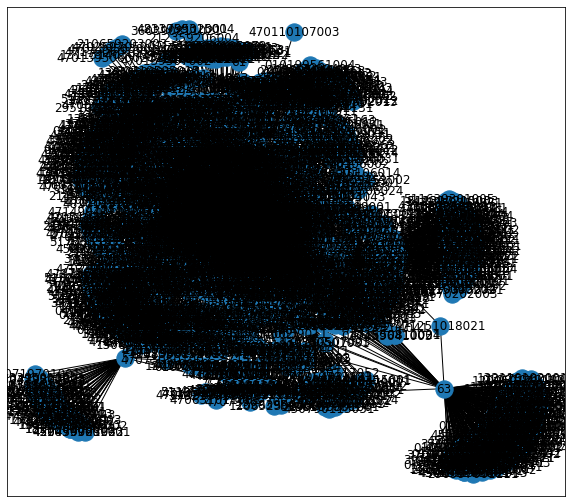

In [38]:
plt.figure(figsize = (10,9))
nx.draw_networkx(graph)
#plt.savefig("./images/map_0.png", format = "png", dpi = 300)
plt.show()

In [ ]:
mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
    pos[elem] = (mx[count], my[count])

In [16]:
od.reset_index()

,orig_index,visitor_home_cbgs_key,visitor_home_cbgs_value
0,0,470890707004,28
1,0,470890707002,22
2,0,470890708004,18
3,0,470890707003,16
4,0,470890707001,14
...,...,...,...
7763,125,471050603024,4
7764,125,470575003004,4
7765,125,470890708001,4
7766,125,471730401004,4


In [9]:
visits = nx.Graph()
visits.add_nodes_from(od["visitor_home_cbgs_key"], bipartite=0)
visits.add_nodes_from(od["orig_index"], bipartite=1)
visits.add_edges_from([(row["orig_index"], row["visitor_home_cbgs_key"]) for idx, row in od.iterrows()])

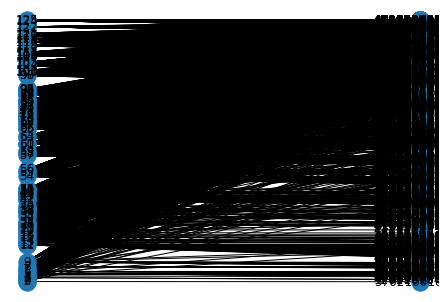

In [23]:
pos = {node:[0, i] for i,node in enumerate(od["orig_index"])}
pos.update({node:[1, i] for i,node in enumerate(od['visitor_home_cbgs_key'])})
nx.draw(visits, pos, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(visits, pos)

plt.show()

In [7]:
safegraph_unpack = stores.jsoncol_merge()
safegraph_unpack.rename(columns={"Unnamed: 0": "StoreID"}, inplace=True)
safegraph_unpack

,StoreID,customer_Title,customer_StreetAddress,customer_FullAddress,customer_NumReviews,customer_PlusCode,customer_GMAPReviewURL,customer_GMAPPOIURL,customer_Category,customer_Street,customer_City,customer_State,customer_ZipCode,other_match_candidates,number_of_candidate_matches,warnings,is_closed,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,safegraph_brand_ids,location_name,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,polygon_wkt,polygon_class,building_height,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,visitor_home_cbg,cbg_visitor_name
0,0,Food City,NaN,"123 US-70, Dandridge, TN 37725",1179,"2H8F+VQ Dandridge, Tennessee",https://www.google.com/maps/place/Food+City/@3...,https://www.google.com/maps/search/Food+City%0...,Grocery,123 US-70,Dandridge,TN,37725,NaN,1,NaN,False,224-224@8g9-jsj-rrk,sg:2cd8573f80c040d39dbaaba17ddfae02,zzw-222@8g9-jsj-rp9,sg:260628d2f3a84bbf94dbd5890ea8b555,SG_BRAND_0c6c4ce554bb53513678968c086c5457,Food City,Food City,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,36.016732,-83.425590,123 W Highway 25 70,Dandridge,TN,37725.0,NaN,NaN,"POLYGON ((-83.4254422835817 36.01687474236751,...",SHARED_POLYGON,NaN,False,NaN,False,NaN,US,2021-02-01T00:00:00-05:00,2021-03-01T00:00:00-05:00,260.0,219.0,"[10,7,6,5,13,9,7,7,14,4,2,12,19,6,5,9,11,13,16...",4.708907e+11,"{""470890707004"":28,""470890707002"":22,""47089070...","{""470890707004"":28,""470890707003"":16,""47089070...","{""US"":217}",6614.0,16.0,"{""<5"":0,""5-10"":79,""11-20"":101,""21-60"":74,""61-1...","{""Exxon Mobil"":28,""Speedway"":19,""Dollar Genera...","{""Walmart"":56,""Dollar General"":53,""Weigel's"":5...","[1,0,0,0,0,2,3,4,4,4,5,10,26,29,25,26,23,28,28...","{""Monday"":29,""Tuesday"":39,""Wednesday"":25,""Thur...","{""android"":100,""ios"":116}",470890707004,28
1,0,Food City,NaN,"123 US-70, Dandridge, TN 37725",1179,"2H8F+VQ Dandridge, Tennessee",https://www.google.com/maps/place/Food+City/@3...,https://www.google.com/maps/search/Food+City%0...,Grocery,123 US-70,Dandridge,TN,37725,NaN,1,NaN,False,224-224@8g9-jsj-rrk,sg:2cd8573f80c040d39dbaaba17ddfae02,zzw-222@8g9-jsj-rp9,sg:260628d2f3a84bbf94dbd5890ea8b555,SG_BRAND_0c6c4ce554bb53513678968c086c5457,Food City,Food City,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,36.016732,-83.425590,123 W Highway 25 70,Dandridge,TN,37725.0,NaN,NaN,"POLYGON ((-83.4254422835817 36.01687474236751,...",SHARED_POLYGON,NaN,False,NaN,False,NaN,US,2021-02-01T00:00:00-05:00,2021-03-01T00:00:00-05:00,260.0,219.0,"[10,7,6,5,13,9,7,7,14,4,2,12,19,6,5,9,11,13,16...",4.708907e+11,"{""470890707004"":28,""470890707002"":22,""47089070...","{""470890707004"":28,""470890707003"":16,""47089070...","{""US"":217}",6614.0,16.0,"{""<5"":0,""5-10"":79,""11-20"":101,""21-60"":74,""61-1...","{""Exxon Mobil"":28,""Speedway"":19,""Dollar Genera...","{""Walmart"":56,""Dollar General"":53,""Weigel's"":5...","[1,0,0,0,0,2,3,4,4,4,5,10,26,29,25,26,23,28,28...","{""Monday"":29,""Tuesday"":39,""Wednesday"":25,""Thur...","{""android"":100,""ios"":116}",470890707002,22
2,0,Food City,NaN,"123 US-70, Dandridge, TN 37725",1179,"2H8F+VQ Dandridge, Tennessee",https://www.google.com/maps/place/Food+City/@3...,https://www.google.com/maps/search/Food+City%0...,Grocery,123 US-70,Dandridge,TN,37725,NaN,1,NaN,False,224-224@8g9-jsj-rrk,sg:2cd8573f80c040d39dbaaba17ddfae02,zzw-222@8g9-jsj-rp9,sg:260628d2f3a84bbf94dbd5890ea8b555,SG_BRAND_0c6c4ce554bb53513678968c086c5457,Food City,Food City,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,36.016732,-83.

In [16]:
visits = nx.Graph()
visits.add_nodes_from(safegraph_unpack["visitor_home_cbg"], bipartite=0)
visits.add_nodes_from(safegraph_unpack["StoreID"], bipartite=1)
visits.add_edges_from([(row["StoreID"], row["visitor_home_cbg"]) for idx, row in safegraph_unpack.iterrows()])

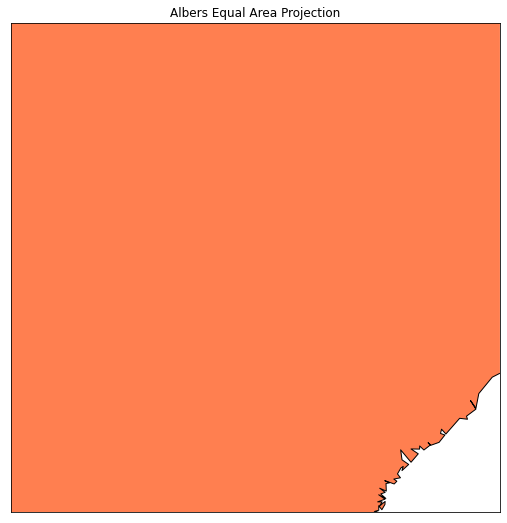

In [17]:
plt.figure(figsize = (10,9))
m = Basemap(width=1000000,height=1000000,
            resolution='l',projection='aea',\
            lat_1=40.,lat_2=60,lon_0=-83.9207,lat_0=35.9606)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')

ax = plt.gca()

plt.title("Albers Equal Area Projection")
plt.show()

## https://medium.com/analytics-vidhya/interative-map-with-osm-directions-and-networkx-582c4f3435bc

In [20]:
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *

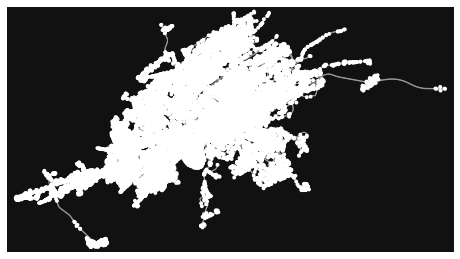

In [21]:
place_name = "Knoxville, Tennessee, United States"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)

In [22]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
202779539,35.923360,-83.874067,3,NaN,NaN,POINT (-83.87407 35.92336)
202779542,35.922283,-83.873573,3,NaN,NaN,POINT (-83.87357 35.92228)
202779582,35.984343,-83.923735,4,NaN,NaN,POINT (-83.92373 35.98434)
202779584,35.984006,-83.922297,4,NaN,NaN,POINT (-83.92230 35.98401)
202779587,35.983759,-83.921248,3,NaN,NaN,POINT (-83.92125 35.98376)
...,...,...,...,...,...,...
8536839291,35.977899,-83.895250,1,NaN,NaN,POINT (-83.89525 35.97790)
8548608825,35.981648,-83.885902,3,NaN,NaN,POINT (-83.88590 35.98165)
8548608835,35.981083,-83.885043,1,NaN,NaN,POINT (-83.88504 35.98108)


In [25]:
center = (35.9606, -83.9207)
m = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=12)
m

Map(center=[35.9606, -83.9207], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [27]:
#style for the destination marker
to_marker_style = AwesomeIcon(
    name='circle',
    icon_color='white',
    marker_color='red',
    spin=False
)
from_marker = Marker(location=center)
to_marker = Marker(location=center, icon=to_marker_style)

def set_nearest_node(marker):
 marker.nearest_node = ox.get_nearest_node(graph, marker.location)
 return

In [28]:
path_layer_list = []
def handle_change_location(event, marker):
    event_owner = event['owner']
    event_owner.nearest_node = ox.get_nearest_node(graph, event_owner.location)
    marker.nearest_node = ox.get_nearest_node(graph, marker.location)
    
    shortest_path = nx.dijkstra_path(graph, event_owner.nearest_node, marker.nearest_node, 
                                     weight='length')
    
    if len(path_layer_list) == 1:
        m.remove_layer(path_layer_list[0])
        path_layer_list.pop()
    
    shortest_path_points = nodes.loc[shortest_path]
    path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
    path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
    m.add_layer(path_layer)
    path_layer_list.append(path_layer)

In [30]:
m.add_layer(from_marker)
m.add_layer(to_marker)
set_nearest_node(from_marker)
set_nearest_node(to_marker)
m

Map(bottom=412103.0, center=[35.9606, -83.9207], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

In [29]:
from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')

In [18]:
mx, my = m(stores["longitude"].values, stores["latitude"].values)
pos = {}
for count, elem in enumerate (stores["customer_Title"]):
    pos[elem] = (mx[count], my[count])

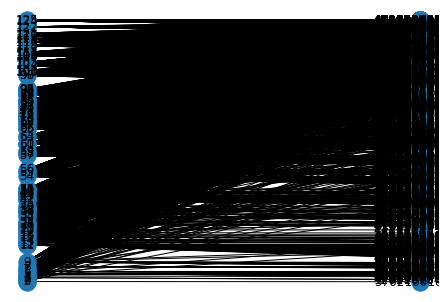

In [19]:
pos = {node:[0, i] for i,node in enumerate(safegraph_unpack["StoreID"])}
pos.update({node:[1, i] for i,node in enumerate(safegraph_unpack['visitor_home_cbg'])})
nx.draw(visits, pos, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(visits, pos)

plt.show()

In [23]:
import folium

### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Functions for simple mapping using folium 
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def make_map_plot(df_, 
                  plot_limit=3000, 
                  radius_col=None, 
                  radius_mod=100, 
                  color='black', 
                  fill_color='red', 
                  fill_opacity = 0.2, 
                  pop_up_col=None,
                  tooltip = 'Click for more info.', 
                  zoom_start=4,
                  tiles = 'OpenStreetMap', 
                  map_width = 700,
                  map_height = 400,
                  marker_type= 'circle', 
                  map_plot=None, 
                  verbose=False):
    # Parameters:
      # df_ is a pandas dataframe. It requires a column called "latitude" and a column called "longitude". 
      # radius_col is a column_name or None. If None, every point is given a fixed radius. 
          # Otherwise, the value in the column radius_col is used as the radius. 
      # radius_mod is to scale your radius units to correspond to units on your map.
      # zoom_start is the scale of the map. Larger numbers = higher resolution.
      # color, fill_color, fill_opacity are marker parameters, see others: https://leafletjs.com/reference-1.3.4.html#path 
      # tiles determines the base layer. Open source options include 'OpenStreetMap', 'Stamen Terrain', 'Stamen Toner'
      # map_width and map_height determine the size of the map image (in pixels)
      # marker_type determines what type of marker is being drawn on the map. Options: 'circle' or 'normal'
    
    # check valid inputs
    valid_inputs = {'marker_type' : {'val' : marker_type, 'valids' : ['circle', 'normal']},
                    'tiles' :  {'val' : tiles, 'valids': ['OpenStreetMap', 'Stamen Terrain', 'Stamen Toner', 'Mapbox Bright', 'Mapbox Control Room']},
                    'radius_col' : {'val' : radius_col, 'valids' : [None] + [col for col in df_.columns if pd.api.types.is_numeric_dtype(df_[col])]}}
    for param, param_valid_dict in valid_inputs.items():
        if(param_valid_dict['val'] not in param_valid_dict['valids']):
            raise Exception("Invalid parameter input for '{0}'. Valid options are {1}. input value was '{2}' .".format(param, param_valid_dict['valids'], param_valid_dict['val']))   

    # create basemap
    if(not map_plot):
        map_plot = folium.Map(width=map_width,
                            height=map_height,
                            location=[df_.latitude.mean(), df_.longitude.mean()],
                            tiles=tiles,
                            zoom_start=zoom_start,
                            control_scale = True)

    # add markers
    counter = 0
    for index, row in df_.iterrows():
        counter+=1
        if(marker_type=='circle'):
            add_circle_marker_to_map(map_plot, row, radius_col, radius_mod, color, fill_color, fill_opacity, pop_up_col, tooltip)
        elif(marker_type=='normal'):
            add_marker_to_map(map_plot, row, pop_up_col, tooltip)
        if(counter>plot_limit): break
    if(verbose): print("Plotted {0} locations".format(counter))
    return(map_plot)


def add_marker_to_map(map_plot, row, pop_up_col, tooltip):
    folium.Marker([row.latitude, row.longitude],
                        popup= row[pop_up_col] if pop_up_col else None,
                        tooltip=tooltip if pop_up_col else None,
                   ).add_to(map_plot)
    return(None)


def add_circle_marker_to_map(map_plot, row, radius_col, radius_mod, color, fill_color, fill_opacity, pop_up_col, tooltip):
    folium.CircleMarker([row.latitude, row.longitude],
                        radius= row[radius_col]/radius_mod if radius_col else 2,
                        color = color,
                        fill_color = fill_color,
                        weight=0.5,
                        fill_opacity= fill_opacity,
                        popup= row[pop_up_col] if pop_up_col else None,
                        tooltip=tooltip if pop_up_col else None,
                   ).add_to(map_plot)
    return(None)

In [12]:
make_map_plot(safegraph, fill_color='red', fill_opacity=1)

In [ ]:
"""
Construct a new dataframe with the each open and close windows 
separated into individual rows. 

The new dataframe will have the following columns: 
brands, sgpid, day, open_window

note: if a POI has > 1 open window (e.g. open from 10am - 2pm, and 5pm - 10pm), then it will have > 1 row in this dataset

See also:  https://docs.safegraph.com/docs/faqs#section-how-do-i-work-with-the-patterns-columns-that-contain-json-

"""


all_oh_data_list = [] # each open_hour window will be one element in this list
for index, row in safegraph.iterrows():
  for key,value in row['open_hours'].items():
    if(value==[]):
      # note: store is closed all day. 
      this_sgpid_oh_data = [ {'brands': row['brands'], 'safegraph_place_id' : row['safegraph_place_id'], 'day' : key, 'open_window' : []}]    
    else:
      this_sgpid_oh_data = [ {'brands': row['brands'], 'safegraph_place_id' : row['safegraph_place_id'], 'day' : key, 'open_window' : this_range} for this_range in value]  
    all_oh_data_list = all_oh_data_list + this_sgpid_oh_data # concat the lists
 
all_oh_data = pd.DataFrame(all_oh_data_list)

all_oh_data.head()